In [1]:
# torch
import torch

# built-in library
import os
import argparse

# custom modules
from exp_utils import get_udevice, load_cfg
from exp_manager import Manager

cores = os.cpu_count()
torch.set_num_threads(cores)

### input options ###
parser = argparse.ArgumentParser(description='AI Fashion Coordinator.')

parser.add_argument('--cfg_path', type=str,
                    default='./cfgs/06_cg_eval_node_with_05.yaml', # 주의) 모델 변경 시 cfg 파일 경로도 변경
                    help="실험에 필요한 값들을 설정해둔 yaml 파일의 경로를 입력합니다.")

args, _ = parser.parse_known_args()
### input options ###

# load configuration file
cfg = load_cfg(args.cfg_path)

# set pred mode
cfg['global']['mode'] = 'pred'

cfg['path']['in_file_fashion'] = '../aif/data/mdata.wst.txt.2023.08.23'
cfg['path']['subWordEmb_path'] = '../aif/sstm_v0p5_deploy/sstm_v4p49_np_n36134_d128.dat'

# check configuration value
print('<Parsed arguments>')
for category, value in cfg.items():
    print(f"##### {category} #####")
    for name, value in cfg[category].items():
        print(f"{name}: {value}")

    print('-' * 20)

# set model
manager = Manager(cfg, get_udevice())

####### 테스트 파일 경로를 바꿔가면서 6회의 로드와 추론을 수행 #######
### 다른 모델을 사용하는 경우에도 6회의 추론이 수행되어야 함에 유의 ###

out = [] # 각 예측 결과를 리스트 형태로 묶어서 리턴

for i in range(6):
    manager._in_file_tst_dialog = f'../aif/data/cl_eval_task{i + 1}.wst.dev' # 경로에 주의
    out.append(manager.pred(task_id=i))

print(out)

<Parsed arguments>
##### global #####
seed: 2024
mode: pred
num_tasks: 6
use_multimodal: False
--------------------
##### path #####
in_file_trn_dialog: /aif/data/task1.ddata.wst.txt
in_file_tst_dialog: /aif/data/cl_eval_task1.wst.dev
in_file_fashion: ../aif/data/mdata.wst.txt.2023.08.23
in_file_img_feats: /aif/data/extracted_feat.json
model_path: ./model
model_file: 06_cg_eval_node_with_05.pt
subWordEmb_path: ../aif/sstm_v0p5_deploy/sstm_v4p49_np_n36134_d128.dat
--------------------
##### data #####
permutation_iteration: 6
num_augmentation: 5
corr_thres: 0.9
mem_size: 16
--------------------
##### model #####
etc: {'use_batch_norm': False, 'use_dropout': False, 'zero_prob': 0.0}
ReqMLP: {'out_size': 300, 'req_node': '[2000,1000,500]'}
PolicyNet: {'eval_node': '[6000,3000,1000,500][2000]'}
--------------------
##### exp #####
learning_rate: 0.0001
max_grad_norm: 40.0
batch_size: 100
epochs: 10
evaluation_iteration: 10
--------------------
Using device: cpu

<Initialize subword embeddi

In [2]:
### input options ###
parser = argparse.ArgumentParser(description='AI Fashion Coordinator.')

parser.add_argument('--cfg_path', type=str,
                    default='./cfgs/05_no_dropout_with_03.yaml', # 주의) 모델 변경 시 cfg 파일 경로도 변경
                    help="실험에 필요한 값들을 설정해둔 yaml 파일의 경로를 입력합니다.")

args, _ = parser.parse_known_args()
### input options ###

# load configuration file
cfg = load_cfg(args.cfg_path)

# set pred mode
cfg['global']['mode'] = 'pred'

cfg['path']['in_file_fashion'] = '../aif/data/mdata.wst.txt.2023.08.23'
cfg['path']['subWordEmb_path'] = '../aif/sstm_v0p5_deploy/sstm_v4p49_np_n36134_d128.dat'

# check configuration value
print('<Parsed arguments>')
for category, value in cfg.items():
    print(f"##### {category} #####")
    for name, value in cfg[category].items():
        print(f"{name}: {value}")

    print('-' * 20)

# set model
manager = Manager(cfg, get_udevice())

####### 테스트 파일 경로를 바꿔가면서 6회의 로드와 추론을 수행 #######
### 다른 모델을 사용하는 경우에도 6회의 추론이 수행되어야 함에 유의 ###

out2 = [] # 각 예측 결과를 리스트 형태로 묶어서 리턴

for i in range(6):
    manager._in_file_tst_dialog = f'../aif/data/cl_eval_task{i + 1}.wst.dev' # 경로에 주의
    out2.append(manager.pred(task_id=i))

print(out2)

<Parsed arguments>
##### global #####
seed: 2024
mode: pred
num_tasks: 6
use_multimodal: False
--------------------
##### path #####
in_file_trn_dialog: /aif/data/task1.ddata.wst.txt
in_file_tst_dialog: /aif/data/cl_eval_task1.wst.dev
in_file_fashion: ../aif/data/mdata.wst.txt.2023.08.23
in_file_img_feats: /aif/data/extracted_feat.json
model_path: ./model
model_file: 05_no_dropout_with_03.pt
subWordEmb_path: ../aif/sstm_v0p5_deploy/sstm_v4p49_np_n36134_d128.dat
--------------------
##### data #####
permutation_iteration: 6
num_augmentation: 5
corr_thres: 0.9
mem_size: 16
--------------------
##### model #####
etc: {'use_batch_norm': False, 'use_dropout': False, 'zero_prob': 0.0}
ReqMLP: {'out_size': 300, 'req_node': '[2000,1000,500]'}
PolicyNet: {'eval_node': '[6000,6000,200][2000]'}
--------------------
##### exp #####
learning_rate: 0.0001
max_grad_norm: 40.0
batch_size: 100
epochs: 10
evaluation_iteration: 10
--------------------
Using device: cpu

<Initialize subword embedding>
loa

In [3]:
import matplotlib.pyplot as plt

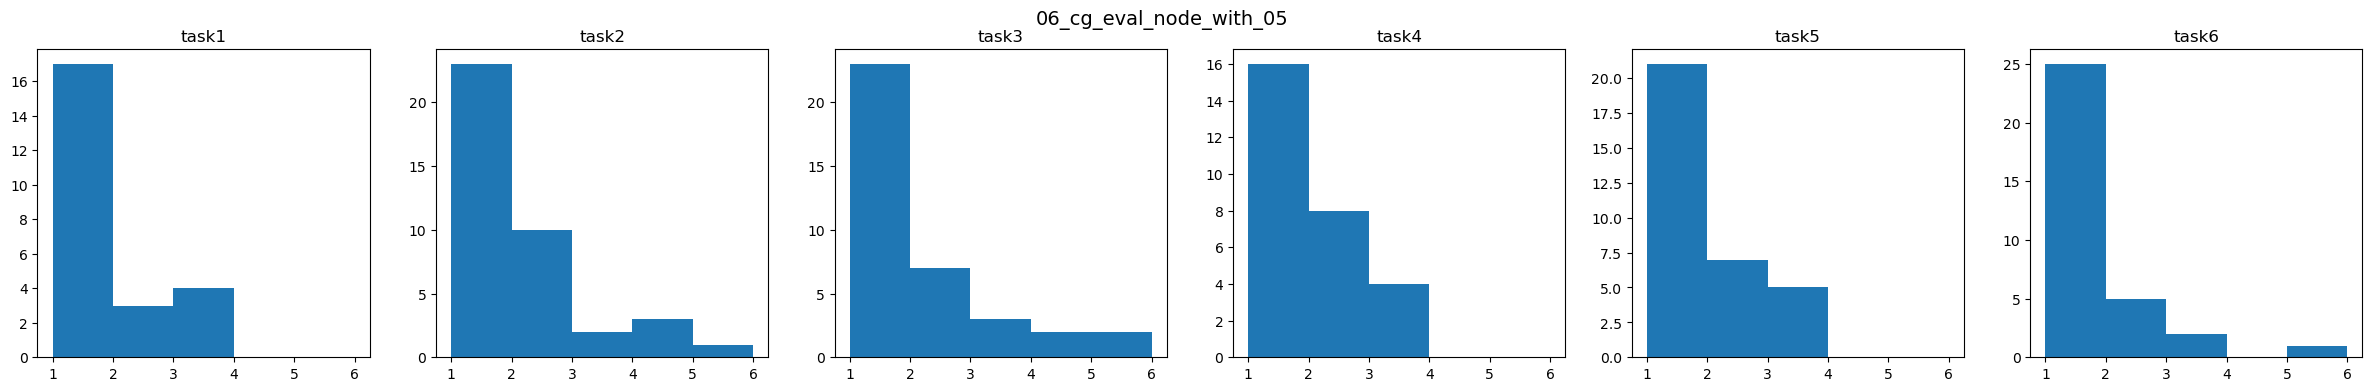

In [7]:
fig, ax = plt.subplots(1, 6, figsize=(30, 4))
fig.suptitle("06_cg_eval_node_with_05", fontsize=14)

for task, arr in enumerate(out):
    ax[task].set_title(f"task{task+1}")    
    ax[task].hist(arr, bins=[1, 2, 3, 4, 5, 6])


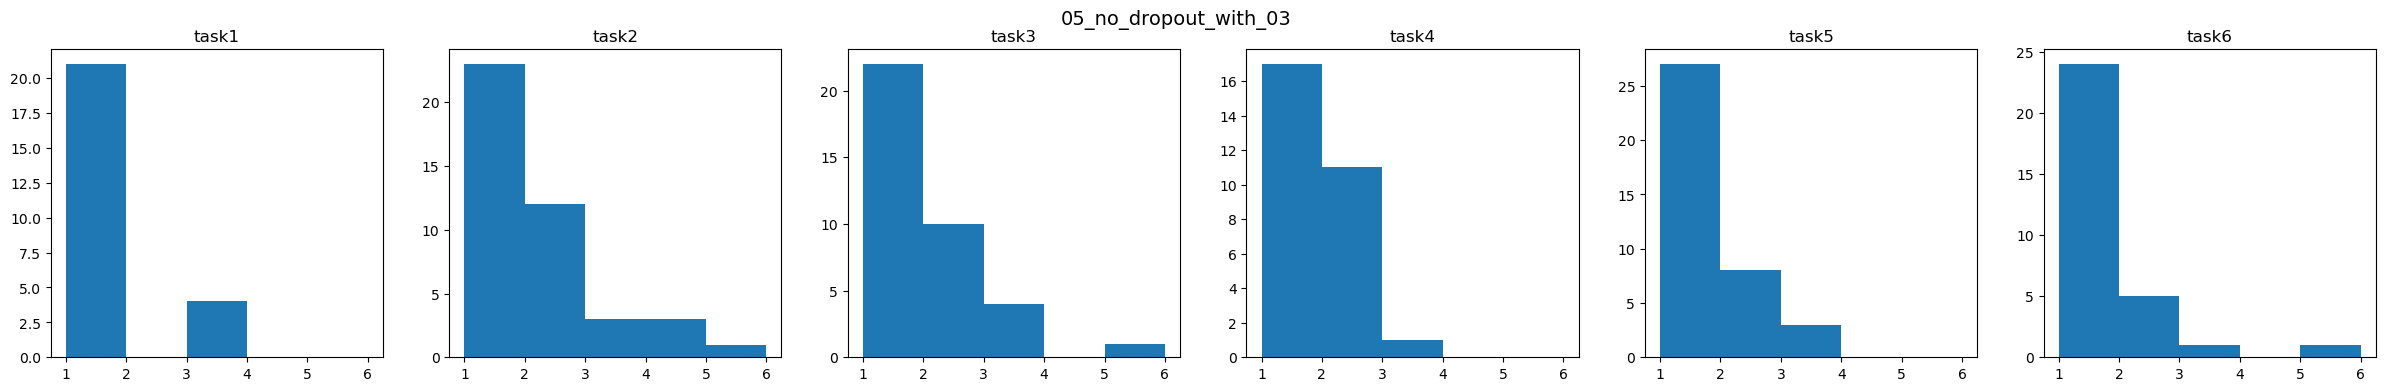

In [8]:
fig2, ax2 = plt.subplots(1, 6, figsize=(30, 4))
fig2.suptitle("05_no_dropout_with_03", fontsize=14)

for task, arr in enumerate(out2):
    ax2[task].set_title(f"task{task+1}")    
    ax2[task].hist(arr, bins=[1, 2, 3, 4, 5, 6])    